# Classification with MLP and CNN on MNIST

MNIST dataset (Modified National Institute of Standards and Technology) consists of 60,000 small images (28x28) in black and white of handwritten numbers for learning and 10,000 for testing.

### Import python modules

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore")

2023-05-05 10:37:32.220613: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-05 10:37:32.253115: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 10:37:32.378477: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 10:37:32.379470: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 10:37:33.034174: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

### Load MNIST dataset

This dataset being a musthave, it is easily accessible. Keras allows you to retrieve it directly and already have its train set and validation without additional processing.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


#### Plot some images

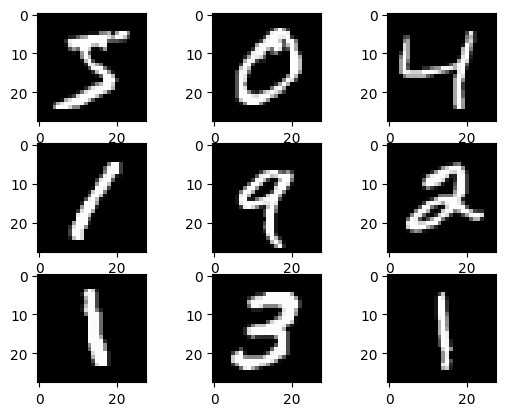

In [4]:
for i in range(9):  
    plt.subplot(331 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

#### Count of the number of values per label

Allows to answer the question: is the dataset balanced? 

Text(0.5, 1.0, 'Count of the number of values per label')

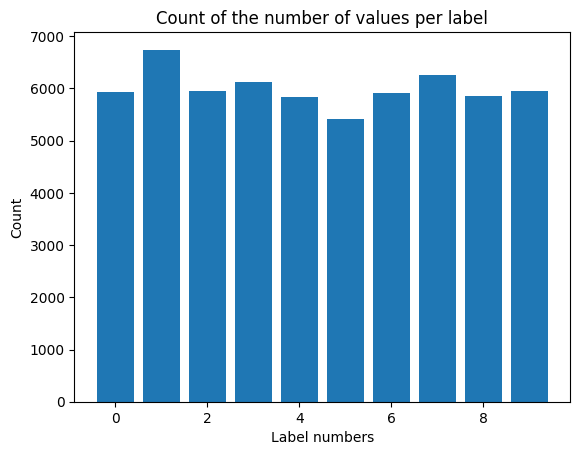

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, label=[str(i) for i in range(10)])
plt.xlabel("Label numbers")
plt.ylabel("Count")
plt.title("Count of the number of values per label")

#### Preparing the data

In [6]:
print('Before normalization : Min={}, max={}'.format(X_train.min(),X_train.max()))

xmax = X_train.max()
x_train = X_train / xmax
x_test  = X_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


## Dense Neural Network

#### Create model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((28,28)),  # we pass images as input to our model
    tf.keras.layers.Flatten(),  # we flatten the image so that it can be taken as an input to the Dense layers. From (28,28) to a vector of 784 components.
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 possible targets and softmax to have an output probability of belonging to one of our classes
])

2023-04-27 10:54:30.504823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-27 10:54:30.520384: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


#### Model summary

In [8]:
model.summary()

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',  # a loss adapted to our problem. We want to predict a category.
              metrics = ['accuracy'])  # number of correct predictions / total numbers of predictions

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### Train the dense model

In [9]:
batch_size = 32  # How many images do we pass at the same time to our network ?
epochs = 16  # Hyperparameter of gradient descent that controls the number of complete passes through the training dataset

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split=0.2)

Epoch 1/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2715 - accuracy: 0.9201 - val_loss: 0.1425 - val_accuracy: 0.9586
Epoch 2/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1155 - accuracy: 0.9652 - val_loss: 0.1199 - val_accuracy: 0.9635
Epoch 3/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0811 - accuracy: 0.9743 - val_loss: 0.1001 - val_accuracy: 0.9709
Epoch 4/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.0985 - val_accuracy: 0.9717
Epoch 5/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0459 - accuracy: 0.9852 - val_loss: 0.0971 - val_accuracy: 0.9737
Epoch 6/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0911 - val_accuracy: 0.9748
Epoch 7/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0937 - val_accuracy:

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.11804535984992981
Test accuracy : 0.9764000177383423


## Convolutional Neural Network

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28, 28, 1)),  # our entry is still an image (28x28) but this time we didn't need to flatten it
    
    tf.keras.layers.Conv2D(16, (3, 3),  activation='relu'),  # we apply 16 differents 2D convolutions to the image with kernels (3x3)
    tf.keras.layers.MaxPooling2D((2, 2)),  # we use 2D max pooling with a size of (2x2)
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),  # same idea as before
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),  # we now flatten everything to add a dense layer for final prediction
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),  # Dropout is a technique where randomly selected neurons (20% in our case) are ignored during training. Goal: reduce overfitting
    tf.keras.layers.Dense(10, activation="softmax")  # 10 neurons because we have 10 possible classes and softmax to have a probability
])

#### Model summary

In [12]:
model.summary()

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 100)              

We have half as many parameters as in the Dense network ! (43,590 vs 89,610)

####  Train the CNN model

In [13]:
batch_size = 32
epochs = 16

history = model.fit(x_train, y_train,
                    batch_size      = batch_size,
                    epochs          = epochs,
                    validation_split=0.2)

Epoch 1/16
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9199 - val_loss: 0.0823 - val_accuracy: 0.9752
Epoch 2/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.0599 - val_accuracy: 0.9830
Epoch 3/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0599 - accuracy: 0.9811 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 4/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0464 - accuracy: 0.9862 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 5/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0467 - val_accuracy: 0.9862
Epoch 6/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0460 - val_accuracy: 0.9872
Epoch 7/16
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.0372 - val_accuracy:

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.03328558802604675
Test accuracy : 0.9904999732971191


#### Results on test data

Accuracy:
- MLP : 97,6%  
- CNN : 99,0%

## Look our predictions

In [15]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 928us/step


#### Example of prediction

In [16]:
y_pred[4369]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
y_pred = np.argmax(y_pred, axis=1)

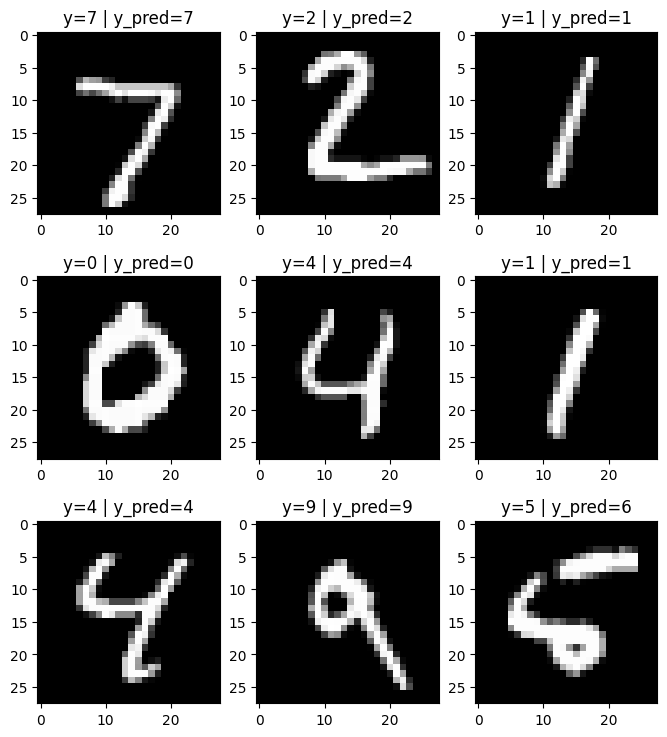

In [18]:
plt.figure(figsize=(8,9))
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
    plt.title(f"y={y_test[i]} | y_pred={y_pred[i]}")
plt.show()

#### Let's explore some errors

In [19]:
errors = [i for i in range(len(X_test)) if y_pred[i] != y_test[i]]
print(f"nb errors: {len(errors)}")

nb errors: 135


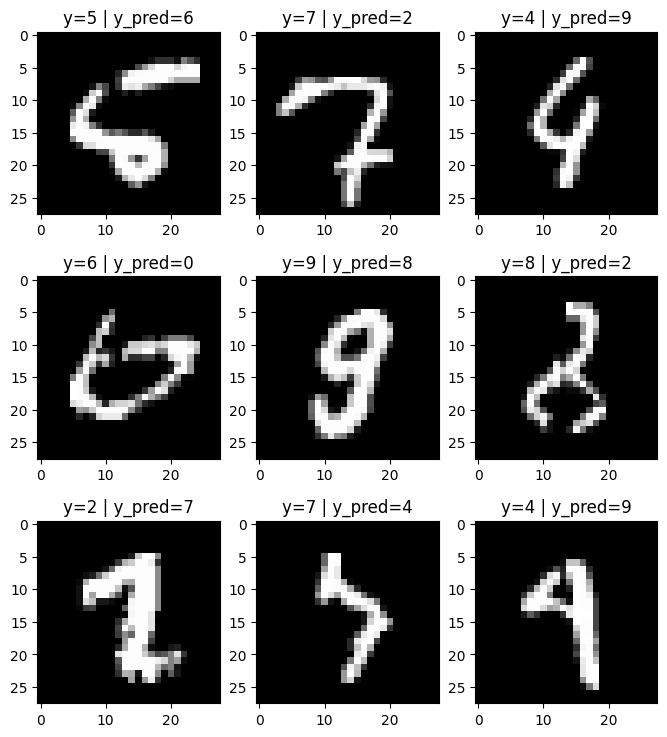

In [20]:
plt.figure(figsize=(8,9))
for i, X_test_index in enumerate(errors[:9]):  
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[X_test_index], cmap=plt.get_cmap('gray'))
    plt.title(f"y={y_test[X_test_index]} | y_pred={y_pred[X_test_index]}")
plt.show()

#### Confusion matrix

In [21]:
confusion_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion matrix')

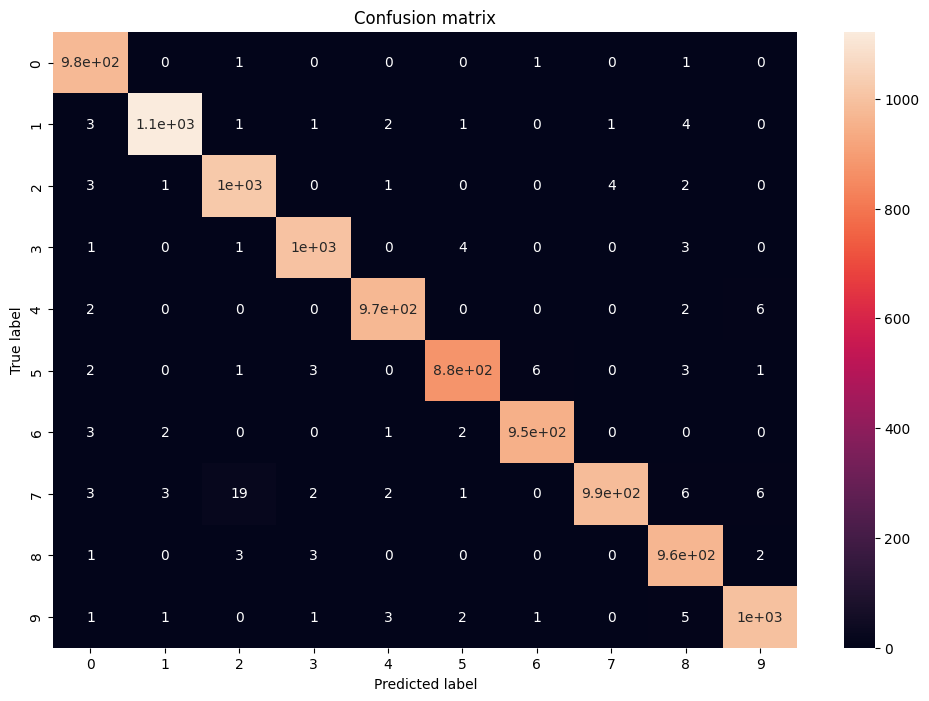

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")